# Text Tokenization OLID

## Import & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import matplotlib.cm as cm

from matplotlib.colors import Normalize
from collections import Counter
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

c:\Users\walkervalentinus\Documents\PERKULIAHAN\Final_Year\SEMHAS\tasi2425112-3.8\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Load Data

In [2]:
clean_df = pd.read_csv("dataset/OLID/clean.csv")

## Check Label Distribution (Imbalance Analysis)

In [3]:
# Label count
label_counts = clean_df["label"].value_counts().sort_index()
labels = label_counts.index
counts = label_counts.values

In [4]:
# Get majority and minority label
major_label = label_counts.idxmax()
minor_label = label_counts.idxmin()

In [5]:
# Count percentage 
total = counts.sum()
diff_percent = ((counts.max() - counts.min()) / total) * 100

In [8]:
plot_df = pd.DataFrame({
    "Label": labels,
    "Count": counts,
    "Category": ["Major" if l == major_label else "Minor" for l in labels]
})

In [9]:
color_map = {"Major": "blue", "Minor": "red"}

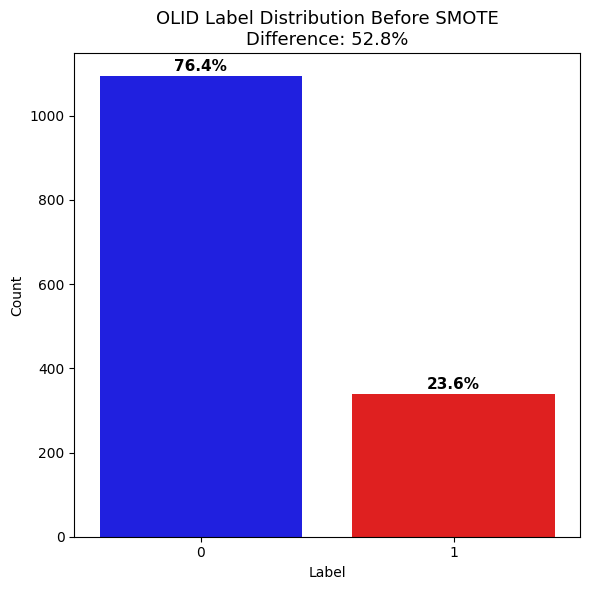

In [10]:
# Plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=plot_df, x="Label", y="Count", hue="Category", palette=color_map, dodge=False)
ax.legend_.remove() 

# Add percentage above the bar
for i, count in enumerate(counts):
    pct = (count / total) * 100
    plt.text(i, count + 5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Title and label
plt.title(f"OLID Label Distribution Before SMOTE\nDifference: {diff_percent:.1f}%", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Tokenization

In [11]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-lite-base-p1")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizerFast'. 
The class this function is called from is 'BertTokenizer'.


In [12]:
def tokenize_column(texts):
    return [tokenizer.encode(text, max_length=128, padding='max_length', truncation=True) for text in texts]

In [13]:
clean_df["token_no_emoji"] = tokenize_column(clean_df["No Stopword Text"].astype(str))
clean_df["token_with_emoji"] = tokenize_column(clean_df["Text with Emoji no Stopword"].astype(str))

In [14]:
clean_df.head(10)

,No Stopword Text,Text with Emoji no Stopword,label,token_no_emoji,token_with_emoji
0,pulang kamu mabuk bikin amerika hebat trump,pulang kamu mabuk bikin amerika hebat trump ti...,1,"[2, 2984, 508, 12883, 2999, 1751, 4364, 17018,...","[2, 2984, 508, 12883, 2999, 1751, 4364, 17018,..."
1,semua saya para benci hapus instagram tanpa alas,semua saya para benci hapus instagram tanpa al...,1,"[2, 366, 209, 383, 11940, 5120, 7484, 705, 870...","[2, 366, 209, 383, 11940, 5120, 7484, 705, 870..."
2,juta orang punya izin bawa senjata cara legal ...,juta orang punya izin bawa senjata cara legal ...,1,"[2, 1633, 232, 1121, 4219, 4772, 4481, 354, 10...","[2, 1633, 232, 1121, 4219, 4772, 4481, 354, 10..."
3,siapa main sama tuhan aku gak kasih bakat cuma,siapa main sama tuhan aku gak kasih bakat cuma...,1,"[2, 1545, 2724, 500, 1251, 304, 1489, 1338, 70...","[2, 1545, 2724, 500, 1251, 304, 1489, 1338, 70..."
4,udah mati jadi kamu necrophiliac bagus tau kam...,udah mati jadi kamu necrophiliac bagus tau kam...,1,"[2, 2137, 1861, 472, 508, 27518, 4423, 18454, ...","[2, 2137, 1861, 472, 508, 27518, 4423, 18454, ..."
5,kayak yang kesel gak suka panggil jadi nyoba b...,kayak kesel gak suka panggil jadi nyoba bikin ...,1,"[2, 5788, 34, 2536, 1489, 1506, 11117, 472, 14...","[2, 5788, 2536, 1489, 1506, 11117, 472, 14663,..."
6,jadi jijik buat kamu cuma dia fans rangers kam...,jadi jijik buat kamu cuma dia fans rangers kam...,1,"[2, 472, 27213, 968, 508, 2279, 364, 7614, 162...","[2, 472, 27213, 968, 508, 2279, 364, 7614, 162..."
7,rip ngakak siapa tau makanya aku usaha keras g...,rip ngakak siapa tau makanya aku usaha keras g...,1,"[2, 20014, 19375, 1545, 2088, 6197, 304, 1062,...","[2, 20014, 19375, 1545, 2088, 6197, 304, 1062,..."
8,siapa yang sebut shitgull bukan aku ryme,siapa yang sebut shitgull bukan aku ryme cium ...,1,"[2, 1545, 34, 5115, 15685, 26281, 3516, 531, 3...","[2, 1545, 34, 5115, 15685, 26281, 3516, 531, 3..."
9,kamu bilang suka cekik kalkun,kamu bilang suka cekik kalkun wajah mulut,1,"[2, 508, 2911, 1506, 3158, 39, 15339, 23, 3, 0...","[2, 508, 2911, 1506, 3158, 39, 15339, 23, 1769..."


## SMOTE Oversampling

In [15]:
X = np.array(clean_df["token_no_emoji"].tolist())
y = clean_df["label"].values

In [16]:
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

## Check Oversampling Result 

In [17]:
print("\nOLID Label counts after SMOTE:")
print(Counter(y_resampled))


OLID Label counts after SMOTE:
Counter({1: 1094, 0: 1094})


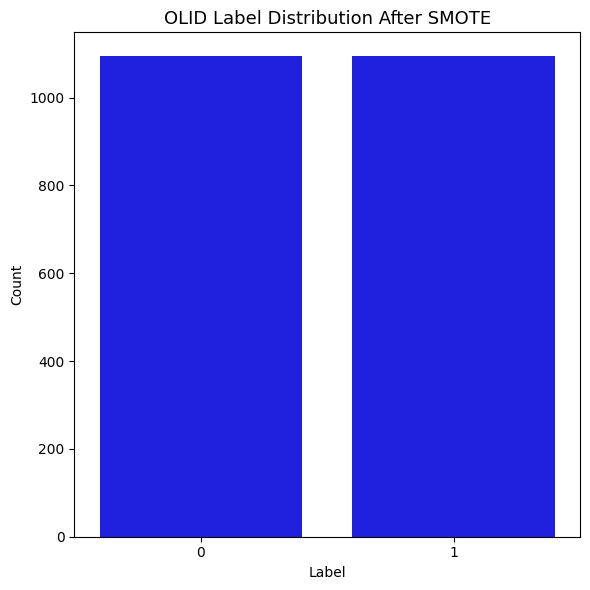

In [18]:
plt.figure(figsize=(6, 6))
sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), color='blue')
plt.title("OLID Label Distribution After SMOTE", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Save Result

In [19]:
clean_df.to_csv("dataset/OLID/tokenized_original.csv", index=False)

In [20]:
# Save SMOTE results for token_no_emoji
resampled_df_no_emoji = pd.DataFrame(X_resampled.tolist())
resampled_df_no_emoji['label'] = y_resampled
resampled_df_no_emoji.to_csv("dataset/OLID/tokenized_smote_no_emoji.csv", index=False)

In [21]:
# Save SMOTE results for token_with_emoji (optional repeat)
X2 = np.array(clean_df["token_with_emoji"].tolist())
X2_resampled, y2_resampled = sm.fit_resample(X2, y)
resampled_df_with_emoji = pd.DataFrame(X2_resampled.tolist())
resampled_df_with_emoji['label'] = y2_resampled
resampled_df_with_emoji.to_csv("dataset/OLID/tokenized_smote_with_emoji.csv", index=False)

## Train Test Split 

In [22]:
def split_and_save(dataframe, output_dir, name_prefix):
    # Split 80% train, 20% temp
    train_df, temp_df = train_test_split(dataframe, test_size=0.2, stratify=dataframe['label'], random_state=42)

    # Split 10% val, 10% test from temp (50:50 split of 20%)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save files
    train_df.to_csv(f"{output_dir}/{name_prefix}_train.csv", index=False)
    val_df.to_csv(f"{output_dir}/{name_prefix}_val.csv", index=False)
    test_df.to_csv(f"{output_dir}/{name_prefix}_test.csv", index=False)

In [23]:
df_no_emoji = pd.read_csv("dataset/OLID/tokenized_smote_no_emoji.csv")
df_with_emoji = pd.read_csv("dataset/OLID/tokenized_smote_with_emoji.csv")

split_and_save(df_no_emoji, "dataset/OLID/TTVWE", "no_emoji")
split_and_save(df_with_emoji, "dataset/OLID/TTVED", "with_emoji")